itchat has already logged in.
No handles with labels found to put in legend.


男性好友： 58.65%
女性好友： 34.05%
不明性别好友： 7.30%


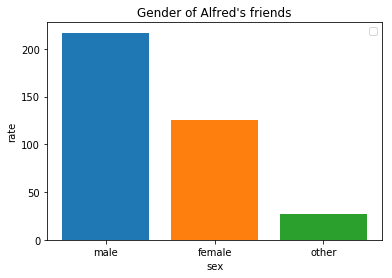

In [22]:

import itchat
import re
import io
from os import path
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import os
from matplotlib import pyplot as plt


def draw(datas):
    for key in datas.keys():
        plt.bar(key, datas[key])

    plt.legend()
    plt.xlabel('sex')
    plt.ylabel('rate')
    plt.title("Gender of Alfred's friends")
    plt.show()

def parse_friedns():
    itchat.login()
    text = dict()
    friedns = itchat.get_friends(update=True)[0:]
    #print("抓取到的朋友信息%s"%(friedns))
    male = "male"
    female = "female"
    other = "other"

    for i in friedns[1:]:
        sex = i['Sex']
        if sex == 1:
            text[male] = text.get(male, 0) + 1
        elif sex == 2:
            text[female] = text.get(female, 0) + 1
        else:
            text[other] = text.get(other, 0) + 1
    total = len(friedns[1:])
    print("男性好友： %.2f%%" % (float(text[male]) / total * 100) + "\n" +
          "女性好友： %.2f%%" % (float(text[female]) / total * 100) + "\n" +

          "不明性别好友： %.2f%%" % (float(text[other]) / total * 100))
    draw(text)

def parse_signature():
    itchat.login()
    siglist = []
    friedns = itchat.get_friends(update=True)[1:]
    for i in friedns:
        signature = i["Signature"].strip().replace("span", "").replace("class", "").replace("emoji", "")
        rep = re.compile("1f\d+\w*|[<>/=]")
        signature = rep.sub("", signature)
        siglist.append(signature)
    text = "".join(siglist)
    with io.open('text.txt', 'a', encoding='utf-8') as f:
        wordlist = jieba.cut(text, cut_all=True)
        word_space_split = " ".join(wordlist)
        f.write(word_space_split)
        f.close()


def draw_signature():
    text = open(u'text.txt', encoding='utf-8').read()
    coloring = np.array(Image.open('3.png'))
    my_wordcloud = WordCloud(background_color="white", max_words=2000,
                         mask=coloring, max_font_size=60, random_state=42, scale=2,
                         font_path="DroidSansFallbackFull.ttf").generate(text)
    image_colors = ImageColorGenerator(coloring)
    plt.imshow(my_wordcloud.recolor(color_func=image_colors))
    plt.imshow(my_wordcloud)
    plt.axis("off")
    plt.show()

if __name__ == '__main__':
    parse_friedns()
    parse_signature()
    draw_signature()
 

itchat has already logged in.


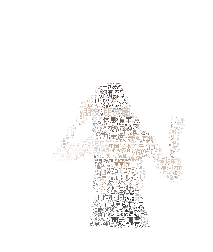